# Exploratory Data Analysis

Purpose: The objective here, is to perform EDA, and data visualization tasks on “Student Habits vs Academic Performance: A Simulated Study” datasets!

####   Femi Jupyter Notebook EDA
###### GitHub: [My GitHub Profile](https://github.com/Airfirm)
####   Author: Oluwafemi Salawu
####   Repository: datafun-06-eda
####   Date: 06/13/2025

Section 1. Imports, Read and Load Data

In [1]:
# Check if file is available in the current directory
import os

# Core Data Science Imports
import numpy as np  # Numerical computing (v1.24+ recommended)
import pandas as pd  # Data manipulation (v2.0+ recommended)
import pyarrow as pa  # Arrow memory format (v12.0+ recommended)

# Visualization Imports
import matplotlib as mpl  # Base matplotlib
import matplotlib.pyplot as plt  # Plotting interface
import seaborn as sns  # Statistical visualization (v0.12+ recommended)

# Configure global settings
plt.style.use('seaborn-v0_8')  # Modern style
pd.set_option('display.max_columns', 30)  # Show more columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Clean number display

# Print versions
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"pyarrow: {pa.__version__}")
print(f"matplotlib: {mpl.__version__}")
print(f"seaborn: {sns.__version__}")

# Verify imports worked
assert not pd.isnull(np.pi)  # Quick sanity check
print("\nAll imports successful! ✅")

numpy: 2.3.0
pandas: 2.3.0
pyarrow: 20.0.0
matplotlib: 3.10.3
seaborn: 0.13.2

All imports successful! ✅


Checking if file path exist

In [2]:
print(os.path.exists('eda_datasets/student_habits_vs_academic_performance.csv'))

True


Read CSV file and Load to DataFrame

In [3]:
url = 'eda_datasets/student_habits_vs_academic_performance.csv'
df = pd.read_csv(url)

# Display the first few rows
df.columns = df.columns.str.replace(' ', '_')  # Clean column names
print("\nDataFrame loaded successfully:")


DataFrame loaded successfully:


Section 2. Initial Data Inspection

In [4]:
# Display first 5 and last 5 rows
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.00,1.20,1.10,No,85.00,8.00,Fair,6,Master,Average,8,Yes,56.20
1,S1001,20,Female,6.90,2.80,2.30,No,97.30,4.60,Good,6,High School,Average,8,No,100.00
2,S1002,21,Male,1.40,3.10,1.30,No,94.80,8.00,Poor,1,High School,Poor,1,No,34.30
3,S1003,23,Female,1.00,3.90,1.00,No,71.00,9.20,Poor,4,Master,Good,1,Yes,26.80
4,S1004,19,Female,5.00,4.40,0.50,No,90.90,4.90,Fair,3,Master,Good,1,No,66.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.60,0.50,1.60,No,77.00,7.50,Fair,2,High School,Good,6,Yes,76.10
996,S1996,17,Female,2.90,1.00,2.40,Yes,86.00,6.80,Poor,1,High School,Average,6,Yes,65.90
997,S1997,20,Male,3.00,2.60,1.30,No,61.90,6.50,Good,5,Bachelor,Good,9,Yes,64.40
998,S1998,24,Male,5.40,4.10,1.10,Yes,100.00,7.60,Fair,0,Bachelor,Average,1,No,69.70


In [5]:
df.shape  # Show DataFrame shape

(1000, 16)

In [6]:
df.info()  # DataFrame summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Section 3. Check for missing / null values and Data Cleaning

In [7]:
# checking for missing values
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Data Cleaning - Filling missing values with most common values

In [8]:
# The parental_education_level column, has 91 missing values, we can fill these with the mode (most common value)
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

Checking to make sure data is clean

In [9]:
# checking for missing values after fillna
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Section 4. Initial Descriptive Statistics

In [10]:
df.describe()  # Summary statistics for all columns

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,84.13,6.47,3.04,5.44,69.60
std,2.31,1.47,1.17,1.08,9.40,1.23,2.03,2.85,16.89
min,17.00,0.00,0.00,0.00,56.00,3.20,0.00,1.00,18.40
25%,18.75,2.60,1.70,1.00,78.00,5.60,1.00,3.00,58.48
50%,20.00,3.50,2.50,1.80,84.40,6.50,3.00,5.00,70.50
75%,23.00,4.50,3.30,2.52,91.03,7.30,5.00,8.00,81.33
max,24.00,8.30,7.20,5.40,100.00,10.00,6.00,10.00,100.00


Observations:
- Average study hours / day: 3.55
- Average media hours / day: 2.51
- Average netflix hours / day: 1.82
- Average sleep hours / night: 6.47
- Average exam score / 100: 69.60

Checking parental education level statistics

In [11]:
# checking parental_education_level field
df['parental_education_level'].describe()

count            1000
unique              3
top       High School
freq              483
Name: parental_education_level, dtype: object

In [12]:
# Display all unique values in the parental_education_level column
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor'], dtype=object)

The parents highest level of education is - Masters
The parents lowest level of education is - High School

Section 5. Distribution of Exam Scores

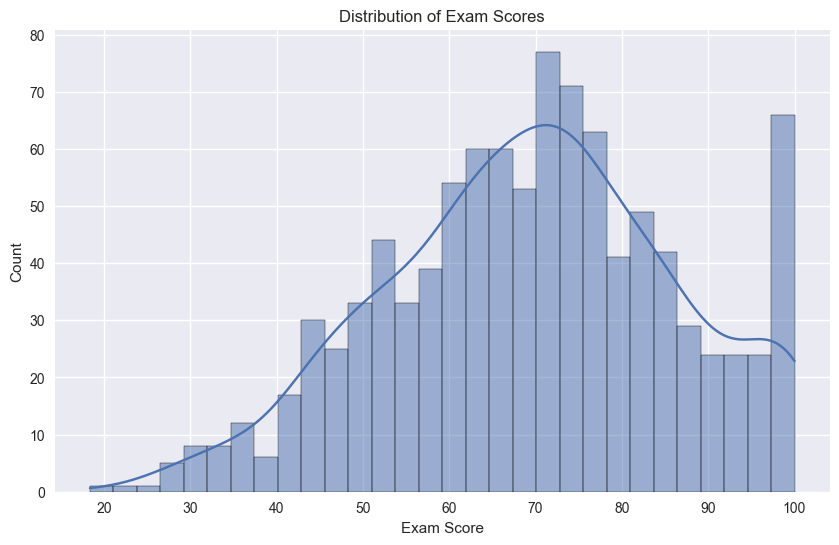

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

Section 6. Study Hours vs Exam Scores

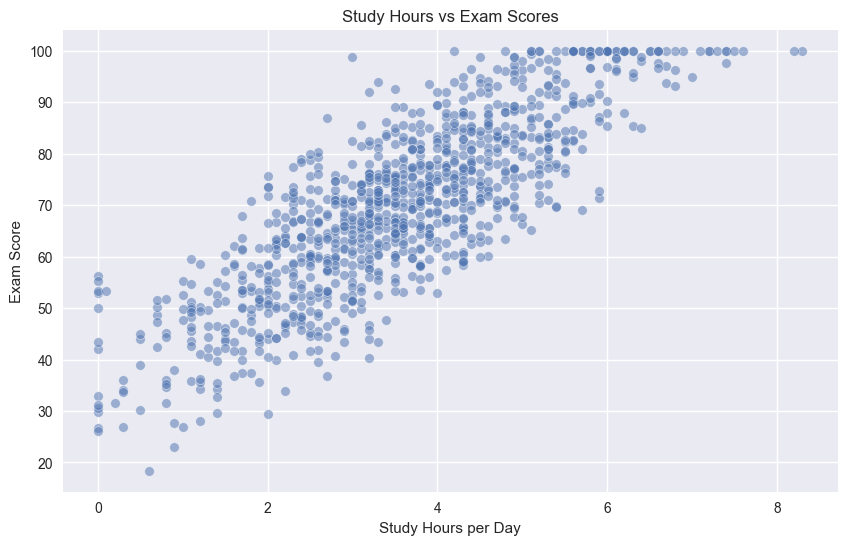

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.5)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

Exam score indicates that more hours of study per day, increased exam score

Section 7. Correlation Heatmap

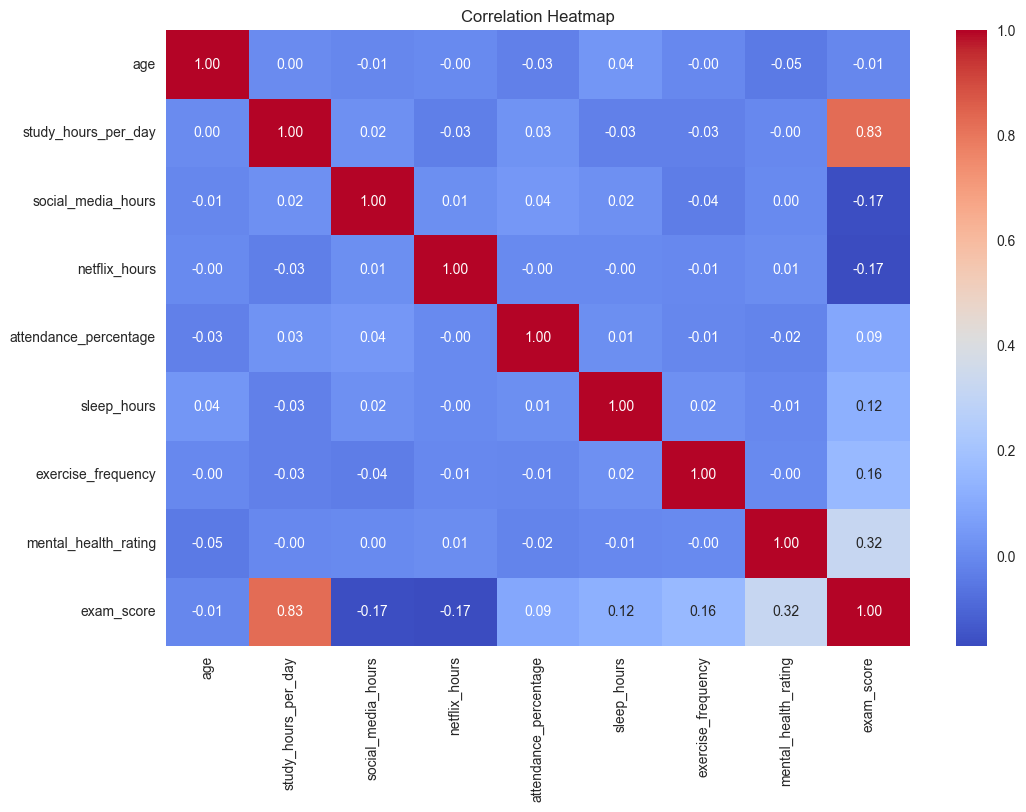

In [15]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Exam score indicates a 0.83 positive correlation with study hours/day, study hours increase results to increased exam score
- Exam score has a weak -0.17 negative correlation with social media hours, social media hours increase results to exam score decrease
- Exam score has a weak -0.17 negative correlation with netflix hours, netflix hours increase results to exam score decrease
- Exam score indicates a slight 0.12 positive correlation with sleep hours/day, slight sleep hours increase results to increased exam score
- Exam score indicates a slight 0.16 positive correlation with exercise frequency/day, exercise frequency increase results to increased exam score 

Section 8. Lifestyle factors Comparison

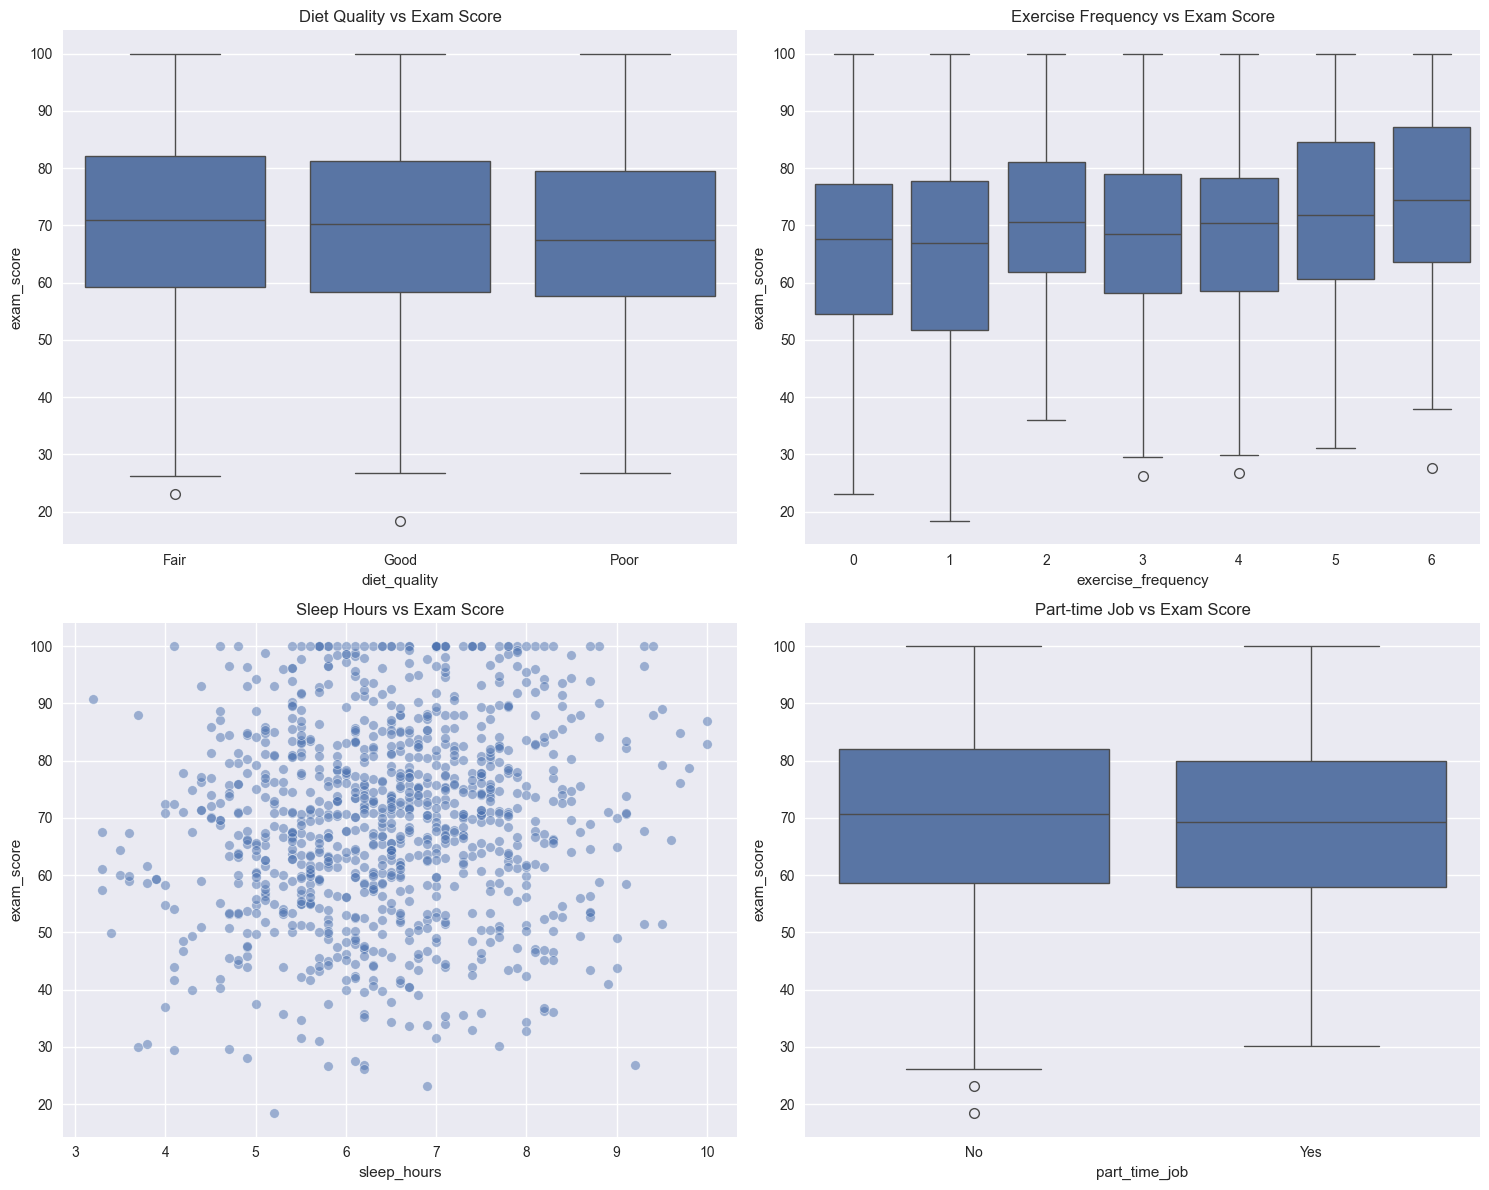

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='diet_quality', y='exam_score', data=df, ax=axes[0,0])
axes[0,0].set_title('Diet Quality vs Exam Score')

sns.boxplot(x='exercise_frequency', y='exam_score', data=df, ax=axes[0,1])
axes[0,1].set_title('Exercise Frequency vs Exam Score')

sns.scatterplot(x='sleep_hours', y='exam_score', data=df, ax=axes[1,0], alpha=0.5)
axes[1,0].set_title('Sleep Hours vs Exam Score')

sns.boxplot(x='part_time_job', y='exam_score', data=df, ax=axes[1,1])
axes[1,1].set_title('Part-time Job vs Exam Score')

plt.tight_layout()
plt.show()

- Those who exercise frequently and practise a healthy lifestyle (quality diet) managed to score higher in exams
- Those without part time jobs scores higher
- Sleep hours also indicates that it is a factor for higher exam scores

Section 9. Parental Education Impact

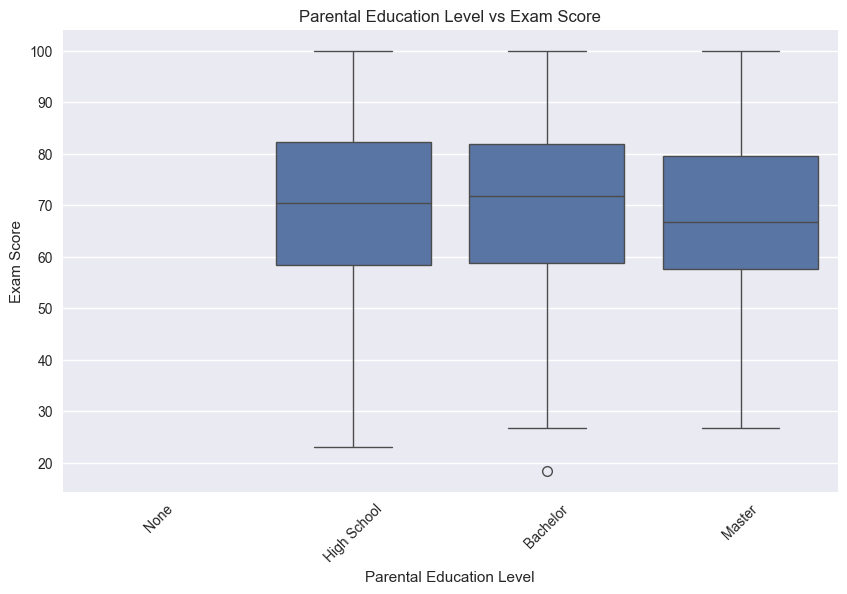

In [17]:
plt.figure(figsize=(10, 6))
order = ['None', 'High School', 'Bachelor', 'Master']
sns.boxplot(x='parental_education_level', y='exam_score', data=df, order=order)
plt.title('Parental Education Level vs Exam Score')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.xticks(rotation=45)
plt.show()

Students who's parents only has high school diploma, tends to score higher in exams

Section 10. Time Allocation Analysis

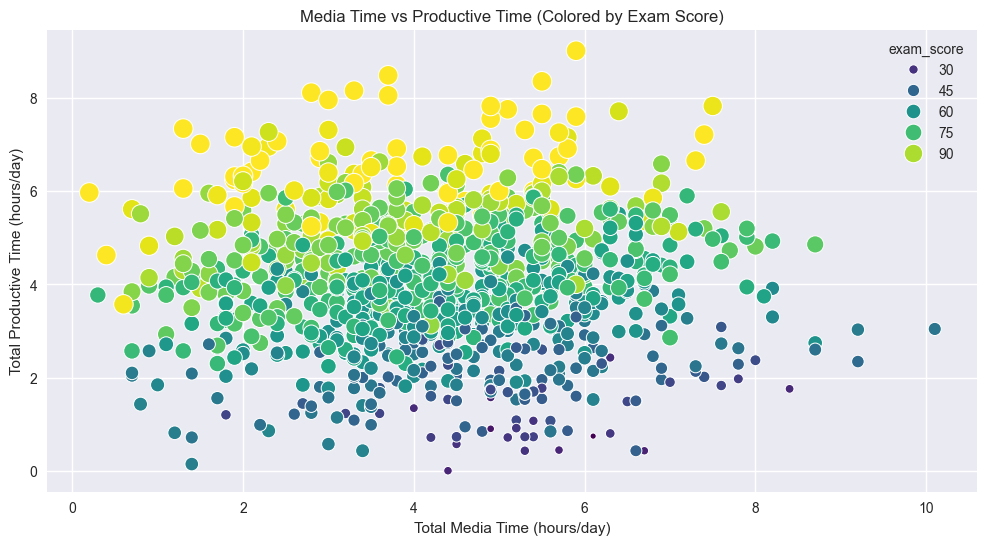

In [18]:
df['total_media_time'] = df['social_media_hours'] + df['netflix_hours']
df['total_productive_time'] = df['study_hours_per_day'] + df['exercise_frequency']/7  # converting weekly exercise to daily

plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_media_time', y='total_productive_time', hue='exam_score', 
                data=df, palette='viridis', size='exam_score', sizes=(20, 200))
plt.title('Media Time vs Productive Time (Colored by Exam Score)')
plt.xlabel('Total Media Time (hours/day)')
plt.ylabel('Total Productive Time (hours/day)')
plt.show()

The more hours students spend on social media and netflixing, impacts their exam score negatively

Section 11. Gender, Exam Score and Study Hours

In [19]:
# Calculate average study hours and exam score by gender
gender_stats = df.groupby('gender')[['study_hours_per_day', 'exam_score']].mean().reset_index()

print(gender_stats)

   gender  study_hours_per_day  exam_score
0  Female                 3.58       69.74
1    Male                 3.51       69.37
2   Other                 3.61       70.65


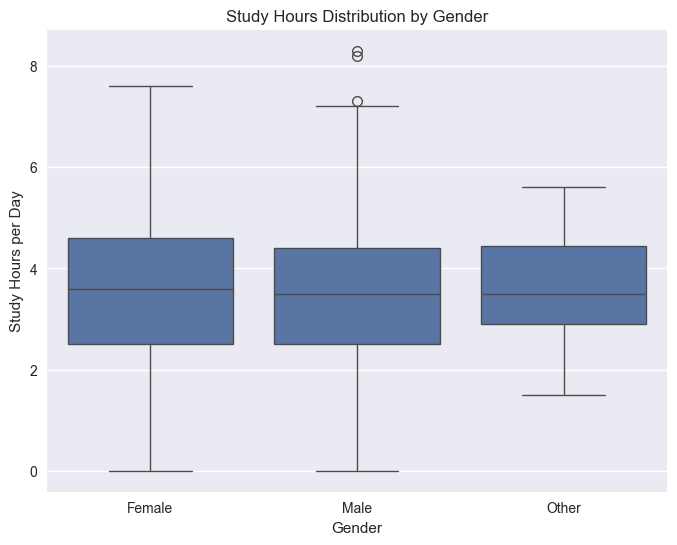

In [20]:
# Boxplot of exam score by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='study_hours_per_day', data=df)
plt.title('Study Hours Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Hours per Day')
plt.show()

Female students tend to study slightly more (Female = 3.58 vs Male = 3.51 hours), and score slightly higher (Female = 69.74 vs Male = 69.37) than male students on average

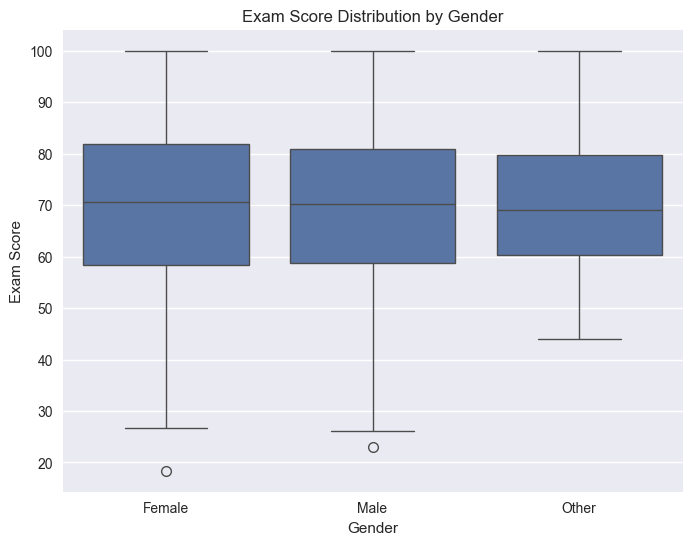

In [21]:
# Boxplot of exam score by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title('Exam Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

Female students tend to study slightly more (Female = 3.58 vs Male = 3.51 hours), and score slightly higher (Female = 69.74 vs Male = 69.37) than male students on average

Section 12. Key Points, Recommendations and Conclusion!

### KEY POINTS:
- Sleep Hours: Students who sleeps 7-8 hours tend to perform better than those with less sleep or excessive sleep
- Digital Consumption: High social media and Netflix time (combined > 5 hours per day) correlates with lower exam scores
- Study Hours: There is a positive correlation (0.83) between study hours and exam scores, but with diminishing returns after about 6hours per day
- Parental Education Level: Students with parents holding high school diploma tend to perform better on average than those who parents has higher education degree
- Lifestyle Factors: Better diet quality and regular exercises show positive relationships with academic performance
- Gender: Female students tend to study slightly more (Female = 3.58 vs Male = 3.51 hours), and score slightly higher (Female = 69.74 vs Male = 69.37) than male students on average
- Time Management: The most successful students balance productive activities (studying, exercising) with moderate leisure time

### Recommendation:
- Students should aim for 6-8 hours of sleep nightly, prioritize sleep
- Cap recreational screen time and replace some digital consumption with physical activities
- Leverage routines, consistent study hours outperform cramming
- Maintain a balanced diet and regular exercise routine
- Try to not allow work to compromise sleep and study time

# Conclusion:

### **Optimal Student Success: A Balanced Approach**  
Academic performance is significantly influenced by lifestyle choices and time management. Key findings reveal:  

1. **Sleep is Foundational**  
   - Aim for **7-8 hours nightly**; this range correlates with peak cognitive performance.  
   - Avoid letting work or leisure compromise sleep quality.  

2. **Strategic Study Habits**  
   - **4-6 hours of daily study** yields optimal results, with diminishing returns beyond 6 hours.  
   - The strong correlation (r = 0.83) between study time and scores underscores its importance.  

3. **Digital Moderation**  
   - Limit combined digital entertainment (social media, streaming) to **<4 hours/day**.  
   - Excessive use (>5 hours/day) correlates with lower exam scores.  

4. **Lifestyle Matters**  
   - **Balanced diet and regular exercise** show measurable benefits for academic outcomes.  
   - Students with active routines tend to perform better.  

5. **Demographic Insights**  
   - **Parental education**: Counterintuitively, students whose parents hold high school diplomas (vs. advanced degrees) often perform better on average.  
   - **Gender trends**: Female students study slightly more (3.58 vs. 3.51 hours), and score slightly higher (69.74 vs. 63774) than the male students.  

6. **Time Management**  
   - Top performers balance **productive activities** (studying, exercise) with **moderate leisure**.  

*"Success hinges not on any single factor, but on harmonizing discipline with self-care."* 